# Objective

The objective of this report is to describe the changes to the vapor compression cycle model, recent improvements to experimental apparatus and results, and next steps for construction and evaluation of the final thermal management system iteration.

# Hypothesis

It was hypothesized that by replacing the current surface mount thermocouples with immersion thermocouples better agreement between the model and experimental results could be achieved. As an alternative to replacement, it was also hypothesized that better agreement could be achieved by applying a thermal compound to the surface mount thermocouples. Regarding the model, it was hypothesized that adding pressure drops across the heat exchangers as well as entropy loss and enthalpy gain during the compression and expansion processes respectively could result in better modeling of the system. Finally, it was hypothesized that replacing the model’s expansion valve function with a mass flowrate correlation for capillary tubes would result in better modeling due to the use of capillary tubes in the prototype.

# Methods

## Experimental Adjustments

In the current experimental setup measurements of pressure and temperature are taken after each thermodynamic process in the vapor compression refrigeration cycle (VCRC). The figure below shows an example of an VCRC with and without losses. The cycles are numbered 1-8 showing the refrigerant undergoing thermodynamic changes. Points 6 and 7 are coincident because there is no phase change from a subcooled fluid to a saturated mixture after expansion. 

In [1]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from IPython.display import Image, display
# from PIL import Image
import CoolProp.CoolProp as CP
from CoolProp.Plots import PropertyPlot
from analysis_functions import *
import optimization_functions as of
import warnings
from importlib import reload 
from scipy.optimize import root_scalar
plt.close('all')
# %matplotlib widget

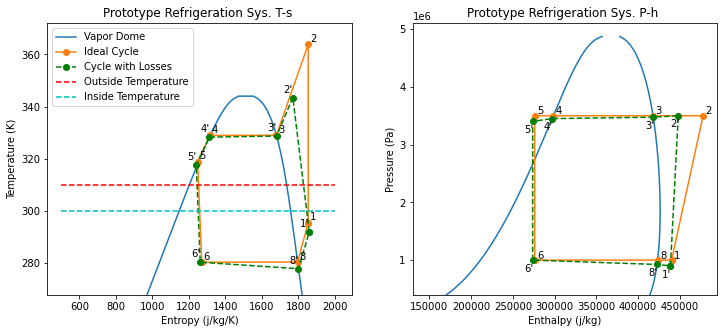

In [2]:
example_plots()

In the context of these cycles the experimental measurements are taken at points 1’, 2’, 5’ and 6’. The measurements at 2’, 5’, and 6’ are located on the outside of the prototype while the measurement at 1’ is located inside of the prototype. Previous experiments have shown that the measurements taken by the surface mounted thermocouples are inaccurate due the gradient effects between the inside/outside temperatures and the refrigerant temperature. As a result, temperature measurements at 2’ and 5’ have been substantially lower than we know the refrigerant to be and measurements at 6’ and 1’ have been substantially higher. In an effort two remedy these inaccuracies two adjustments to the experimental apparatus are tried: replacing the surface mounted thermocouples with immersion thermocouples and adhering the surface mount thermocouples with thermal paste to the refrigerant tubing.  The thermal paste is used to insulate from the ambient temperature and increase heat transfer from the refrigerant. 

In the first experiment Four Omega Engineering TC-K-1/8NPT-U-72 immersion thermocouples were attached to the prototype’s refrigeration cycle schrader valve ports and a test was run with the heating element power at maximum (1390) and the wind tunnel at 500 RPM (~ 5.2 m/s). 

In the following experiment a hybrid approach was taken with three immersion thermocouples at points 1’, 5’, and 6’ and a surface mount thermocouple at 2’. The test was run with the heating element power at maximum (1389) and the wind tunnel at 500 RPM (~ 5.2 m/s).


Finally, the 4 surface mount thermocouples which were previously installed were adhered to the refrigeration tubing at their respective locations using McMaster-Carr 3883K24 Heat Sink Compound. A test was run with the heating element power at maximum (1366 W) and the wind tunnel at 500 RPM (~ 5.2 m/s). Nine additional tests were conducted under the same conditions with heating element power ranging from 1365 - 1450 W .

## Model Adjustments

The VCRC model developed by Dubicki et al. uses 4 functions which represent the 4 major components of a VCRC: the compressor, the condenser, the expansion valve, and the evaporator. The four functions are used in conjunction with the thermodynamic values of the refrigerant (R-410a) and air in an optimization to minimize the norm of the mass and energy deficits. To improve this model, for the purpose of evaluating the POD’s thermal management system prototype, the component function representing expansion has been changed from a thermostatic expansion valve mass flow rate model to a capillary tube mass flow rate correlation. An enthalpy gain of 47.5 % was also added to the expansion function and a superheat entropy loss of 20% was added to the compressor function. 

# Results

Figure 2 shows the steady state results of the thermodynamic values based on measurements from four immersion thermocouples and four pressure transducers.

Figure 3 shows the steady state results of the thermodynamic values based on measurements from three immersion thermocouples, one surface mount thermocouple at 2' and four pressure transducers.

In [3]:
from analysis_functions import *

path = 'C:/Users/charl/Google Drive/school/Graduate/Pod Project/Prototype/'

# # list
# files =['01-23-2021/test.lvm', '01-23-2021/test2.lvm', '01-23-2021/test3.lvm', '01-23-2021/test4.lvm', 
#         '01-24-2021/test.lvm', '01-24-2021/test2.lvm', '01-24-2021/test3.lvm', '01-24-2021/test4.lvm',
#         '01-25-2021/test.lvm', '01-25-2021/test2.lvm', '01-25-2021/test3.lvm', '01-25-2021/test4.lvm',
#        ]

# P_amb = [100.81e3, 100.83e3, 100.74e3, 100.77e3,
#          100.83e3, 100.78e3, 100.67e3, 100.70e3,
#          101.37e3, 101.23e3, 101.25e3, 101.24e3,
#         ]

# Q_element = [0.58e3, 0.81e3, 1.00e3, 0.6e3, 
#              0.81e3, 1.03e3, 0.61e3, 0.80e3,
#              1.01e3, 0.61e3, 0.82e3, 1.03e3,
#             ]

# W_refrig = [0.380e3, 0.405e3, 0.439e3, 0.395e3,
#             0.395e3, 0.417e3, 0.375e3, 0.400e3,
#             0.466e3, 0.379e3, 0.405e3, 0.459e3,
#            ]

# experimentalData = pd.DataFrame()

# for ind, file in enumerate(files):
    
# #     if file not in experimentalData['file'].values:
#     experimentalData = experimentalData.append(experimental_analysis_fan(path + file, P_amb[ind], Q_element[ind], W_refrig[ind]))

# #     thermodynamic_plots(experimentalData.iloc[-1])
        
# experimentalData.to_pickle(path + 'experimentalDataframe.pkl')

experimentalData = pd.read_pickle(path + 'experimentalDataframe.pkl')

experimentalData = experimentalData.reset_index()

C:\ProgramData\Anaconda3\envs\jupyterlab-debugger\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
C:\ProgramData\Anaconda3\envs\jupyterlab-debugger\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


no exception when superheated phase takes up entire domain
initial Point: [2.66425722e+05 2.65254855e+05 5.00000000e-01]


C:\Users\charl\Google Drive\school\Graduate\Pod Project\Prototype\VCRC\cycle_functions.py:921: UserWarning: Partial Evaporation
  warnings.warn('Partial Evaporation')


no exception when superheated phase takes up entire domain
initial Point: [6.47736171e+05 4.39267801e+05 5.00000000e-01]


C:\Users\charl\Google Drive\school\Graduate\Pod Project\Prototype\VCRC\cycle_functions.py:41: UserWarning: Flooded Compressor, vapor quality < 1
  warnings.warn('Flooded Compressor, vapor quality < 1')
C:\Users\charl\Google Drive\school\Graduate\Pod Project\Prototype\VCRC\cycle_functions.py:894: RuntimeWarning: invalid value encountered in log
  dz_1 = (c_p_f * flowrate / UA_1 ) * np.log( (T_pod - T_in) / (T_pod - T_sat));


For now, we don't support T [-nan K] below Ttriple [200 K]
initial Point: [6.47736171e+05 7.87293693e+05 5.00000000e-01]
Compression ratio too high: 4.999074253477561
initial Point: [1.32602872e+06 2.65254855e+05 5.00000000e-01]
Compression ratio too high: 8.67581992218318
initial Point: [2.30130335e+06 2.65254855e+05 5.00000000e-01]
Compression ratio too high: 5.238952978380645
initial Point: [2.30130335e+06 4.39267801e+05 5.00000000e-01]
Compression ratio too high: 3.752446762976471
initial Point: [2.30130335e+06 6.13280747e+05 5.00000000e-01]


C:\Users\charl\Google Drive\school\Graduate\Pod Project\Prototype\VCRC\optimization_functions.py:220: UserWarning: Warning: |Deficit| = [0.06076764]
  warnings.warn('Warning: |Deficit| = ' +


[ 0.00531486 -0.01381218 -0.05893795]


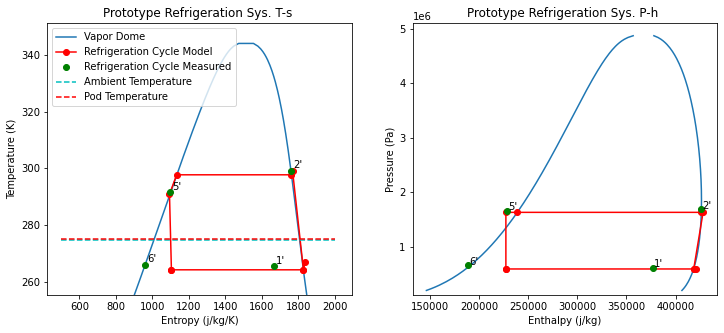

C:\Users\charl\Google Drive\school\Graduate\Pod Project\Prototype\VCRC\cycle_functions.py:41: UserWarning: Flooded Compressor, vapor quality < 1
  warnings.warn('Flooded Compressor, vapor quality < 1')
C:\Users\charl\Google Drive\school\Graduate\Pod Project\Prototype\VCRC\cycle_functions.py:921: UserWarning: Partial Evaporation
  warnings.warn('Partial Evaporation')
C:\ProgramData\Anaconda3\envs\jupyterlab-debugger\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
C:\ProgramData\Anaconda3\envs\jupyterlab-debugger\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the functio

no exception when superheated phase takes up entire domain
initial Point: [2.94259300e+05 7.58245274e+05 5.00000000e-01]
no exception when superheated phase takes up entire domain
initial Point: [2.94259300e+05 9.93295915e+05 5.00000000e-01]
Two-phase inputs not supported for pseudo-pure for now : PropsSI("H","P",288142.1942,"T",244.7793806,"R410a")
initial Point: [8.21410187e+05 2.88143991e+05 5.00000000e-01]
no exception when superheated phase takes up entire domain
initial Point: [8.21410187e+05 7.58245274e+05 5.00000000e-01]
Compression ratio too high: 6.072360435634022
initial Point: [1.74971417e+06 2.88143991e+05 5.00000000e-01]
Compression ratio too high: 3.3442892199454097
initial Point: [1.74971417e+06 5.23194632e+05 5.00000000e-01]
Compression ratio too high: 10.686224058773274
initial Point: [3.07917124e+06 2.88143991e+05 5.00000000e-01]
Compression ratio too high: 5.8853265217853155
initial Point: [3.07917124e+06 5.23194632e+05 5.00000000e-01]
Compression ratio too high: 4.

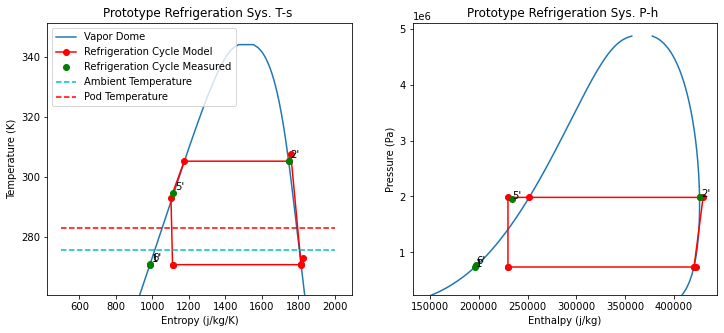

C:\Users\charl\Google Drive\school\Graduate\Pod Project\Prototype\VCRC\cycle_functions.py:41: UserWarning: Flooded Compressor, vapor quality < 1
  warnings.warn('Flooded Compressor, vapor quality < 1')
C:\Users\charl\Google Drive\school\Graduate\Pod Project\Prototype\VCRC\cycle_functions.py:921: UserWarning: Partial Evaporation
  warnings.warn('Partial Evaporation')
C:\ProgramData\Anaconda3\envs\jupyterlab-debugger\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Compression ratio too high: 3.225280363837548
initial Point: [3.21026301e+05 3.09425590e+05 5.00000000e-01]
no exception when superheated phase takes up entire domain
initial Point: [3.21026301e+05 6.01227164e+05 5.00000000e-01]


C:\ProgramData\Anaconda3\envs\jupyterlab-debugger\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


no exception when superheated phase takes up entire domain
initial Point: [3.21026301e+05 1.18483031e+06 5.00000000e-01]
Two-phase inputs not supported for pseudo-pure for now : PropsSI("H","P",309426.2853,"T",246.5610697,"R410a")
initial Point: [9.86143616e+05 3.09425590e+05 5.00000000e-01]


C:\Users\charl\Google Drive\school\Graduate\Pod Project\Prototype\VCRC\cycle_functions.py:652: RuntimeWarning: invalid value encountered in log
  np.log(rho_rat + (1 - rho_rat) *
C:\ProgramData\Anaconda3\envs\jupyterlab-debugger\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Compression ratio too high: 6.945996125766846
initial Point: [2.14926895e+06 3.09425590e+05 5.00000000e-01]
Compression ratio too high: 3.574803468069409
initial Point: [2.14926895e+06 6.01227164e+05 5.00000000e-01]
Compression ratio too high: 12.314438188480413
initial Point: [3.8104023e+06 3.0942559e+05 5.0000000e-01]
Compression ratio too high: 6.337708162577777
initial Point: [3.81040230e+06 6.01227164e+05 5.00000000e-01]
Compression ratio too high: 4.2668305550501575
initial Point: [3.81040230e+06 8.93028737e+05 5.00000000e-01]
Compression ratio too high: 3.2159898913344485
initial Point: [3.81040230e+06 1.18483031e+06 5.00000000e-01]
[ 0.00010902 -0.00049972 -0.00089605]


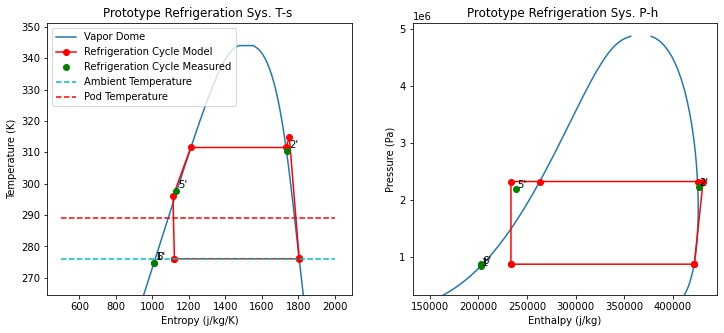

C:\ProgramData\Anaconda3\envs\jupyterlab-debugger\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


Two-phase inputs not supported for pseudo-pure for now : PropsSI("H","P",265186.2842,"T",242.7580433,"R410a")
initial Point: [2.69024327e+05 2.69387784e+05 5.00000000e-01]


C:\Users\charl\Google Drive\school\Graduate\Pod Project\Prototype\VCRC\cycle_functions.py:921: UserWarning: Partial Evaporation
  warnings.warn('Partial Evaporation')
C:\ProgramData\Anaconda3\envs\jupyterlab-debugger\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Two-phase inputs not supported for pseudo-pure for now : PropsSI("H","P",776379.8993,"T",272.2160218,"R410a")
initial Point: [2.69024327e+05 8.24490056e+05 5.00000000e-01]


C:\Users\charl\Google Drive\school\Graduate\Pod Project\Prototype\VCRC\cycle_functions.py:41: UserWarning: Flooded Compressor, vapor quality < 1
  warnings.warn('Flooded Compressor, vapor quality < 1')


no exception when superheated phase takes up entire domain
initial Point: [6.70195865e+05 6.39455965e+05 5.00000000e-01]
Two-phase inputs not supported for pseudo-pure for now : PropsSI("H","P",855374.6517,"T",275.2774602,"R410a")
initial Point: [6.70195865e+05 8.24490056e+05 5.00000000e-01]
Compression ratio too high: 5.149301490227742
initial Point: [1.38715892e+06 2.69387784e+05 5.00000000e-01]
Compression ratio too high: 8.983011214605156
initial Point: [2.41991348e+06 2.69387784e+05 5.00000000e-01]
Compression ratio too high: 5.325257475998516
initial Point: [2.41991348e+06 4.54421874e+05 5.00000000e-01]
Compression ratio too high: 3.784331708137656
initial Point: [2.41991348e+06 6.39455965e+05 5.00000000e-01]
[ 0.00414457 -0.0124359  -0.04397499]


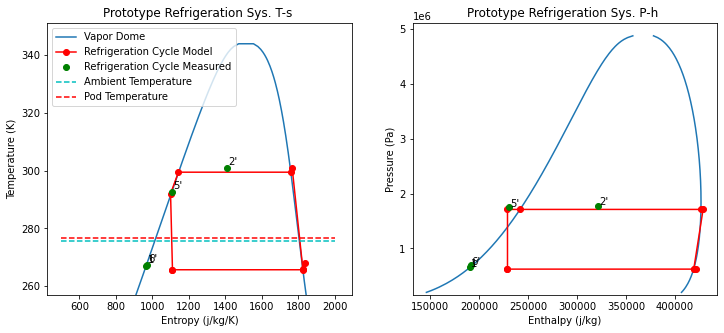

C:\Users\charl\Google Drive\school\Graduate\Pod Project\Prototype\VCRC\cycle_functions.py:41: UserWarning: Flooded Compressor, vapor quality < 1
  warnings.warn('Flooded Compressor, vapor quality < 1')
C:\Users\charl\Google Drive\school\Graduate\Pod Project\Prototype\VCRC\cycle_functions.py:921: UserWarning: Partial Evaporation
  warnings.warn('Partial Evaporation')
C:\ProgramData\Anaconda3\envs\jupyterlab-debugger\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
C:\ProgramData\Anaconda3\envs\jupyterlab-debugger\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the functio

no exception when superheated phase takes up entire domain
initial Point: [2.89270059e+05 4.85602992e+05 5.00000000e-01]
no exception when superheated phase takes up entire domain
initial Point: [2.89270059e+05 9.01025527e+05 5.00000000e-01]
Two-phase inputs not supported for pseudo-pure for now : PropsSI("H","P",277892.1104,"T",243.8829376,"R410a")
initial Point: [7.71038102e+05 2.77891725e+05 5.00000000e-01]
no exception when superheated phase takes up entire domain
initial Point: [7.71038102e+05 4.85602992e+05 5.00000000e-01]
no exception when superheated phase takes up entire domain
initial Point: [7.71038102e+05 6.93314260e+05 5.00000000e-01]
Two-phase inputs not supported for pseudo-pure for now : PropsSI("H","P",780723.1536,"T",272.4181176,"R410a")
initial Point: [7.71038102e+05 9.01025527e+05 5.00000000e-01]
Compression ratio too high: 5.783907525475757
initial Point: [1.60730004e+06 2.77891725e+05 5.00000000e-01]
Compression ratio too high: 3.309905552052265
initial Point: [1.

C:\Users\charl\Google Drive\school\Graduate\Pod Project\Prototype\VCRC\optimization_functions.py:220: UserWarning: Warning: |Deficit| = [0.09579233]
  warnings.warn('Warning: |Deficit| = ' +


[ 0.0093321  -0.02018729 -0.09317487]


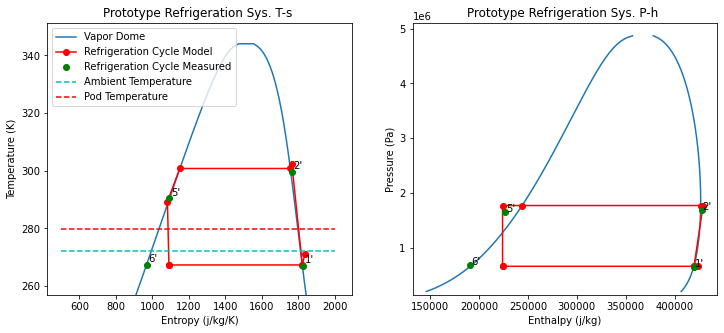

C:\ProgramData\Anaconda3\envs\jupyterlab-debugger\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
C:\Users\charl\Google Drive\school\Graduate\Pod Project\Prototype\VCRC\cycle_functions.py:921: UserWarning: Partial Evaporation
  warnings.warn('Partial Evaporation')
C:\ProgramData\Anaconda3\envs\jupyterlab-debugger\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Compression ratio too high: 4.069974940040229
initial Point: [3.21141094e+05 3.03406308e+05 5.00000000e-01]
no exception when superheated phase takes up entire domain
initial Point: [3.21141094e+05 1.13065677e+06 5.00000000e-01]
Two-phase inputs not supported for pseudo-pure for now : PropsSI("H","P",303407.2461,"T",246.0264749,"R410a")
initial Point: [9.67730862e+05 3.03406308e+05 5.00000000e-01]
Compression ratio too high: 3.256945529051615
initial Point: [9.67730862e+05 1.13065677e+06 5.00000000e-01]
Compression ratio too high: 6.871756357419218
initial Point: [2.08493423e+06 3.03406308e+05 5.00000000e-01]
Compression ratio too high: 3.5999498566117145
initial Point: [2.08493423e+06 5.79156463e+05 5.00000000e-01]
Compression ratio too high: 12.105058766439548
initial Point: [3.67275119e+06 3.03406308e+05 5.00000000e-01]
Compression ratio too high: 6.341552625548354
initial Point: [3.67275119e+06 5.79156463e+05 5.00000000e-01]
Compression ratio too high: 4.296084638069527
initial Poi

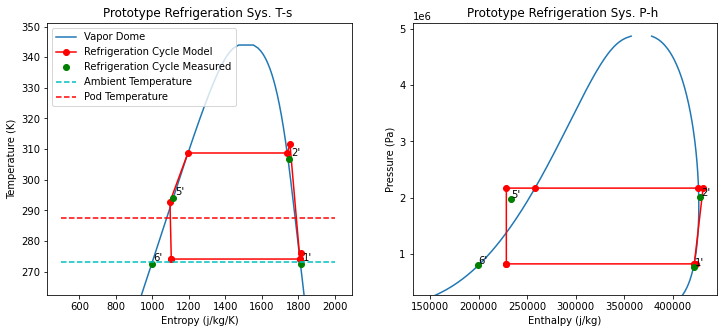

C:\ProgramData\Anaconda3\envs\jupyterlab-debugger\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
C:\Users\charl\Google Drive\school\Graduate\Pod Project\Prototype\VCRC\cycle_functions.py:41: UserWarning: Flooded Compressor, vapor quality < 1
  warnings.warn('Flooded Compressor, vapor quality < 1')
C:\Users\charl\Google Drive\school\Graduate\Pod Project\Prototype\VCRC\cycle_functions.py:921: UserWarning: Partial Evaporation
  warnings.warn('Partial Evaporation')
C:\ProgramData\Anaconda3\envs\jupyterlab-debugger\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different len

Two-phase inputs not supported for pseudo-pure for now : PropsSI("H","P",211426.7409,"T",237.3480329,"R410a")
initial Point: [2.71065173e+05 2.65785093e+05 5.00000000e-01]
For now, we don't support T [-85.672 K] below Tmin(saturation) [200 K] : PropsSI("H","P",233745.064,"T",-85.67196657,"R410a")
initial Point: [6.66406549e+05 4.41212009e+05 5.00000000e-01]
no exception when superheated phase takes up entire domain
initial Point: [6.66406549e+05 6.16638925e+05 5.00000000e-01]
Two-phase inputs not supported for pseudo-pure for now : PropsSI("H","P",681618.2716,"T",268.2369439,"R410a")
initial Point: [6.66406549e+05 7.92065841e+05 5.00000000e-01]
Compression ratio too high: 5.121217210635119
initial Point: [1.36114320e+06 2.65785093e+05 5.00000000e-01]
Compression ratio too high: 8.861577149161851
initial Point: [2.35527511e+06 2.65785093e+05 5.00000000e-01]
Compression ratio too high: 5.338193568028086
initial Point: [2.35527511e+06 4.41212009e+05 5.00000000e-01]
Compression ratio too h

C:\Users\charl\Google Drive\school\Graduate\Pod Project\Prototype\VCRC\optimization_functions.py:220: UserWarning: Warning: |Deficit| = [0.05794536]
  warnings.warn('Warning: |Deficit| = ' +


[ 0.00526087 -0.01392544 -0.05600062]


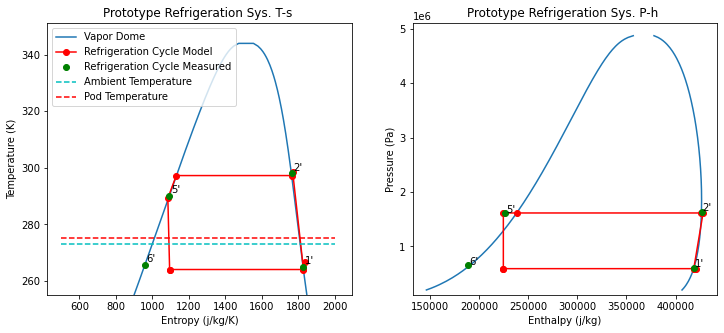

C:\ProgramData\Anaconda3\envs\jupyterlab-debugger\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
C:\Users\charl\Google Drive\school\Graduate\Pod Project\Prototype\VCRC\cycle_functions.py:41: UserWarning: Flooded Compressor, vapor quality < 1
  warnings.warn('Flooded Compressor, vapor quality < 1')
C:\Users\charl\Google Drive\school\Graduate\Pod Project\Prototype\VCRC\cycle_functions.py:921: UserWarning: Partial Evaporation
  warnings.warn('Partial Evaporation')
C:\ProgramData\Anaconda3\envs\jupyterlab-debugger\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different len

Compression ratio too high: 3.2266928832964394
initial Point: [2.8964886e+05 2.8116498e+05 5.0000000e-01]
no exception when superheated phase takes up entire domain
initial Point: [2.89648860e+05 9.30484824e+05 5.00000000e-01]
Two-phase inputs not supported for pseudo-pure for now : PropsSI("H","P",281165.411,"T",244.1673686,"R410a")
initial Point: [7.82668691e+05 2.81164980e+05 5.00000000e-01]
no exception when superheated phase takes up entire domain
initial Point: [7.82668691e+05 7.14044876e+05 5.00000000e-01]
no exception when superheated phase takes up entire domain
initial Point: [7.82668691e+05 9.30484824e+05 5.00000000e-01]
Compression ratio too high: 5.850939773846168
initial Point: [1.64507937e+06 2.81164980e+05 5.00000000e-01]
Compression ratio too high: 3.305994923936608
initial Point: [1.64507937e+06 4.97604928e+05 5.00000000e-01]
Compression ratio too high: 10.232002871540425
initial Point: [2.87688089e+06 2.81164980e+05 5.00000000e-01]
Compression ratio too high: 5.78145

C:\Users\charl\Google Drive\school\Graduate\Pod Project\Prototype\VCRC\optimization_functions.py:220: UserWarning: Warning: |Deficit| = [0.07422199]
  warnings.warn('Warning: |Deficit| = ' +


[ 0.00738181 -0.01857477 -0.07148001]


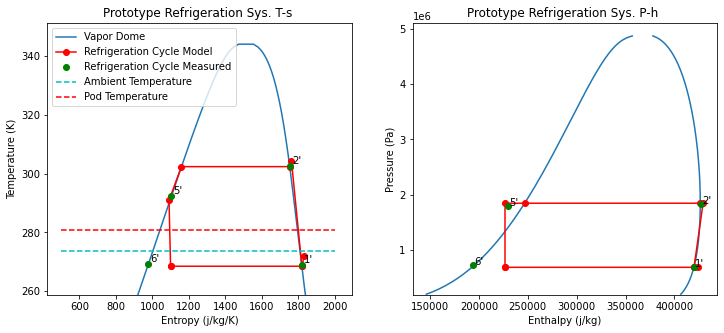

C:\ProgramData\Anaconda3\envs\jupyterlab-debugger\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
C:\ProgramData\Anaconda3\envs\jupyterlab-debugger\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
C:\Users\charl\Google Drive\school\Graduate\Pod Project\Prototype\VCRC\cycle_functions.py:921: UserWarning: Partial Evaporation
  warnings.warn('Partial Evaporation')


no exception when superheated phase takes up entire domain
initial Point: [3.19601182e+05 1.11420087e+06 5.00000000e-01]


C:\Users\charl\Google Drive\school\Graduate\Pod Project\Prototype\VCRC\cycle_functions.py:652: RuntimeWarning: invalid value encountered in log
  np.log(rho_rat + (1 - rho_rat) *
C:\ProgramData\Anaconda3\envs\jupyterlab-debugger\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Compression ratio too high: 6.8155467860566485
initial Point: [2.05541811e+06 3.01577874e+05 5.00000000e-01]
Compression ratio too high: 3.5905497275209353
initial Point: [2.05541811e+06 5.72452206e+05 5.00000000e-01]
Two-phase inputs not supported for pseudo-pure for now : PropsSI("H","P",806761.7624,"T",273.389403,"R410a")
initial Point: [2.05541811e+06 8.43326538e+05 5.00000000e-01]
Compression ratio too high: 11.99280575233975
initial Point: [3.61676487e+06 3.01577874e+05 5.00000000e-01]
Compression ratio too high: 6.3180206633412554
initial Point: [3.61676487e+06 5.72452206e+05 5.00000000e-01]
Compression ratio too high: 4.28868855041818
initial Point: [3.61676487e+06 8.43326538e+05 5.00000000e-01]
Compression ratio too high: 3.2460617882623293
initial Point: [3.61676487e+06 1.11420087e+06 5.00000000e-01]
[ 0.00216208 -0.00879444 -0.01849983]


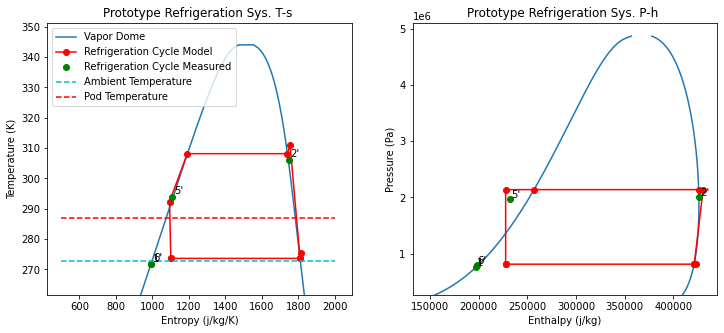

C:\ProgramData\Anaconda3\envs\jupyterlab-debugger\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
C:\ProgramData\Anaconda3\envs\jupyterlab-debugger\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
C:\Users\charl\Google Drive\school\Graduate\Pod Project\Prototype\VCRC\cycle_functions.py:921: UserWarning: Partial Evaporation
  warnings.warn('Partial Evaporation')
C:\Users\charl\Google Driv

Two-phase inputs not supported for pseudo-pure for now : PropsSI("H","P",270985.5689,"T",243.287744,"R410a")
initial Point: [6.68762404e+05 2.65926210e+05 5.00000000e-01]
Two-phase inputs not supported for pseudo-pure for now : PropsSI("H","P",814437.1876,"T",273.6951712,"R410a")
initial Point: [6.68762404e+05 7.93335890e+05 5.00000000e-01]
Compression ratio too high: 5.136669510979282
initial Point: [1.36597506e+06 2.65926210e+05 5.00000000e-01]
Compression ratio too high: 8.88677055641383
initial Point: [2.36322521e+06 2.65926210e+05 5.00000000e-01]
Compression ratio too high: 5.349938258542169
initial Point: [2.36322521e+06 4.41729437e+05 5.00000000e-01]
Compression ratio too high: 3.8268829382488154
initial Point: [2.36322521e+06 6.17532663e+05 5.00000000e-01]


C:\Users\charl\Google Drive\school\Graduate\Pod Project\Prototype\VCRC\optimization_functions.py:220: UserWarning: Warning: |Deficit| = [0.05102203]
  warnings.warn('Warning: |Deficit| = ' +


[ 0.0046649  -0.01309063 -0.04909299]


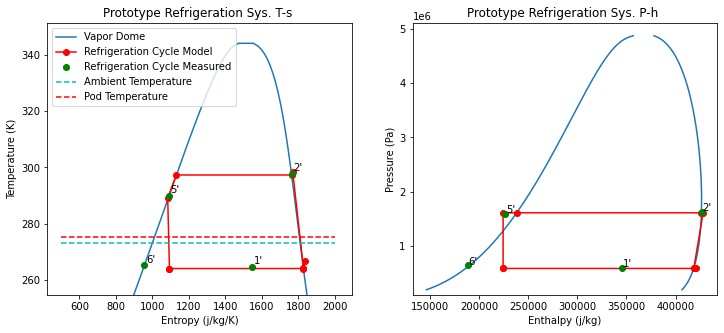

C:\ProgramData\Anaconda3\envs\jupyterlab-debugger\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
C:\Users\charl\Google Drive\school\Graduate\Pod Project\Prototype\VCRC\cycle_functions.py:921: UserWarning: Partial Evaporation
  warnings.warn('Partial Evaporation')
C:\ProgramData\Anaconda3\envs\jupyterlab-debugger\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


no exception when superheated phase takes up entire domain
initial Point: [2.90631902e+05 9.40091193e+05 5.00000000e-01]


C:\Users\charl\Google Drive\school\Graduate\Pod Project\Prototype\VCRC\cycle_functions.py:41: UserWarning: Flooded Compressor, vapor quality < 1
  warnings.warn('Flooded Compressor, vapor quality < 1')


Two-phase inputs not supported for pseudo-pure for now : PropsSI("H","P",282231.8362,"T",244.277445,"R410a")
initial Point: [7.89612874e+05 2.82232355e+05 5.00000000e-01]
no exception when superheated phase takes up entire domain
initial Point: [7.89612874e+05 5.01518634e+05 5.00000000e-01]
no exception when superheated phase takes up entire domain
initial Point: [7.89612874e+05 7.20804914e+05 5.00000000e-01]
Two-phase inputs not supported for pseudo-pure for now : PropsSI("H","P",794538.3166,"T",272.9625601,"R410a")
initial Point: [7.89612874e+05 9.40091193e+05 5.00000000e-01]
Compression ratio too high: 5.891749836334992
initial Point: [1.66284243e+06 2.82232355e+05 5.00000000e-01]
Compression ratio too high: 3.3156144485576027
initial Point: [1.66284243e+06 5.01518634e+05 5.00000000e-01]
Compression ratio too high: 10.311789277802578
initial Point: [2.91032057e+06 2.82232355e+05 5.00000000e-01]
Compression ratio too high: 5.803015822075652
initial Point: [2.91032057e+06 5.01518634e+

C:\Users\charl\Google Drive\school\Graduate\Pod Project\Prototype\VCRC\optimization_functions.py:220: UserWarning: Warning: |Deficit| = [0.08595922]
  warnings.warn('Warning: |Deficit| = ' +


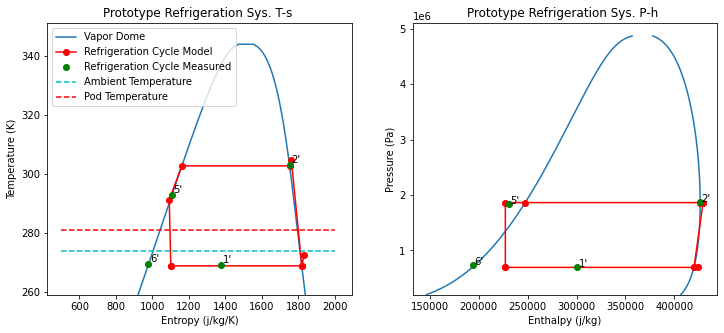

C:\ProgramData\Anaconda3\envs\jupyterlab-debugger\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
C:\ProgramData\Anaconda3\envs\jupyterlab-debugger\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
C:\Users\charl\Google Drive\school\Graduate\Pod Project\Prototype\VCRC\cycle_functions.py:921: UserWarning: Partial Evaporation
  warnings.warn('Partial Evaporation')


no exception when superheated phase takes up entire domain
initial Point: [3.21665040e+05 1.16651149e+06 5.00000000e-01]


C:\Users\charl\Google Drive\school\Graduate\Pod Project\Prototype\VCRC\cycle_functions.py:41: UserWarning: Flooded Compressor, vapor quality < 1
  warnings.warn('Flooded Compressor, vapor quality < 1')


Two-phase inputs not supported for pseudo-pure for now : PropsSI("H","P",307393.1337,"T",246.3316362,"R410a")
initial Point: [9.82117044e+05 3.07390166e+05 5.00000000e-01]
Compression ratio too high: 6.933577785659109
initial Point: [2.13131363e+06 3.07390166e+05 5.00000000e-01]
Compression ratio too high: 3.5894965597405117
initial Point: [2.13131363e+06 5.93763942e+05 5.00000000e-01]
Compression ratio too high: 12.262118970083758
initial Point: [3.76925478e+06 3.07390166e+05 5.00000000e-01]
Compression ratio too high: 6.348069527579469
initial Point: [3.76925478e+06 5.93763942e+05 5.00000000e-01]
Compression ratio too high: 4.282573863236963
initial Point: [3.76925478e+06 8.80137717e+05 5.00000000e-01]
Compression ratio too high: 3.231219586546345
initial Point: [3.76925478e+06 1.16651149e+06 5.00000000e-01]
[ 0.00247996 -0.00992342 -0.0209392 ]


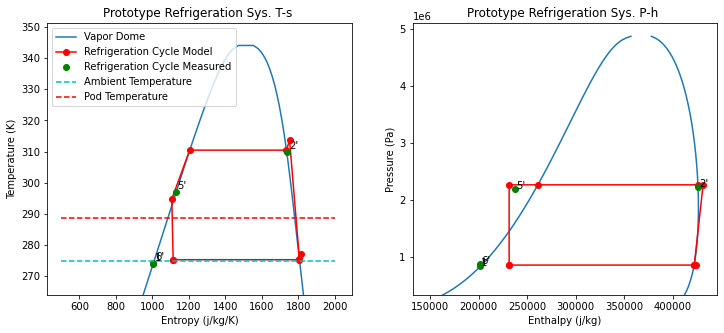

In [4]:
modelData = pd.DataFrame()

for index, row in experimentalData.iterrows():
    
    Inputs = np.array([
                       row['Ambient T (K)'],
                       row['Pod T (K)'],
                       row['Total Heat Load (W)'],
                      ])

    Param = np.array([
                      5000,
                      2600, # Matches HT-900 CFM of 350 CFM and ~ 40: W measured with power meter 01/22 https://www.cnet.com/products/honeywell-ht-900-turboforce-air-circulator-fan/
                      3300 # Matches 80 W measured with power meter 01/22
                     ])

    [Props, m_dot, Q_L, Q_H, W_comp, W_fan_c, W_fan_e, COSP, Deficit, converged] = of.solve_cycle_shotgun(Inputs, Param)

    modelData = modelData.append(pd.DataFrame({'P (Pa)': [Props[0]], 'T (K)': [Props[1]], 'h (j/kg)': [Props[2]], 's (j/kg K)': [Props[3]], 'abcissa': [Props[4]], 
                                               'Mass Flux (kg/s)': [m_dot], 'Evaporator Heat Transfer (W)': Q_L, 'Condenser Heat Transfer (W)': Q_H, 'Compressor Work (W)': W_comp, 
                                               'Condenser Fan Work': W_fan_c, 'Evapoator Fan Work': W_fan_e, 'COSP': COSP, 'Deficits': [Deficit]}))

    print(Deficit)

    thermodynamic_plots(experimentalData.iloc[index], modelData.iloc[-1], lgnd = ['Vapor Dome', 'Refrigeration Cycle Model',
                        'Refrigeration Cycle Measured', 'Ambient Temperature',
                       'Pod Temperature'], annotate = True, color ='r')

modelData.to_pickle(path + 'modelDataframe.pkl')

modelData = pd.read_pickle(path + 'modelDataframe.pkl')

modelData = modelData.reset_index()

[ 0.12205167 -0.09081325  0.15127467]
5.203731567629926
[0.005141650478415209, 0.004514103431230324]
1102.6241327520215
128.98312826560226


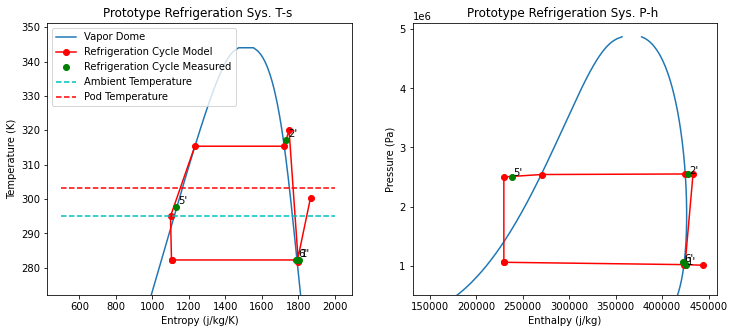

[ 0.1117707  -0.08999306  0.11333953]
5.362611509198611
[0.005089083147766843, 0.0045202727632716495]
1088.3843514485566
128.7374520895708


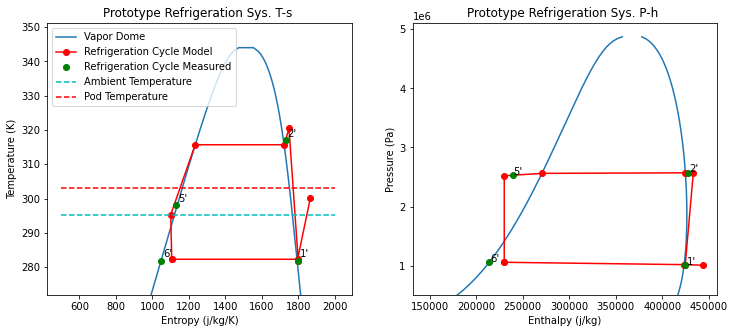

[ 0.04731989 -0.07512054  0.10392138]
5.2293481779663695
[0.004400806615790014, 0.004192560949818337]
984.6679123526656
102.01264664216137


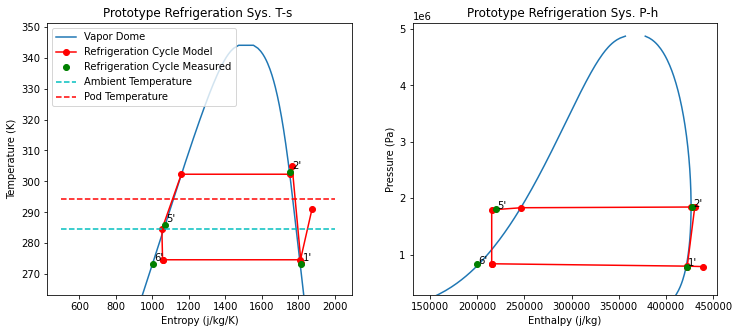

[ 0.0242782  -0.090329    0.17529866]
5.088525710524756
[0.004181064484449746, 0.004079555770235484]
959.0233016210044
95.78555067421303


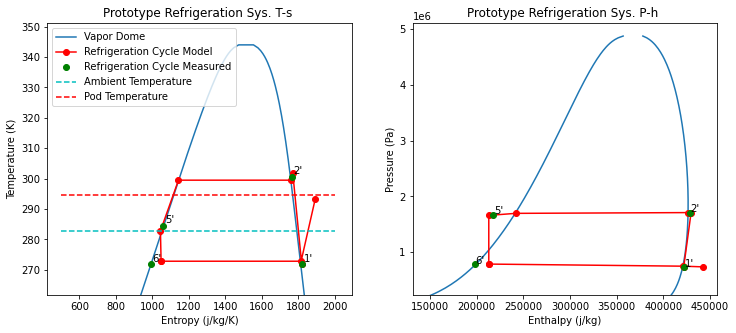

[ 0.02152901 -0.08670545  0.146405  ]
5.1352294705058865
[0.004151503796632117, 0.004062126026318516]
951.480999678451
94.5428363750614


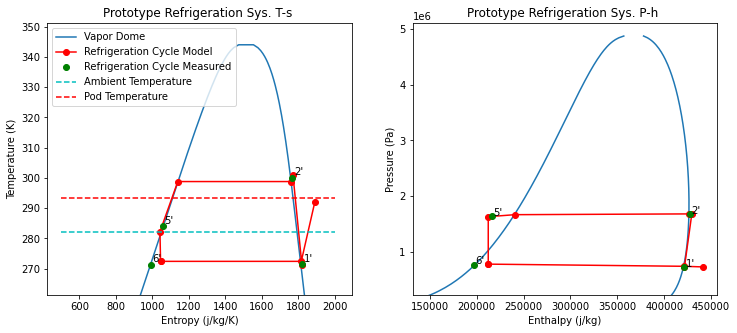

[ 0.02572187 -0.07115395  0.03285599]
5.218648382551676
[0.004002803510154919, 0.0038998439262365146]
914.3264360090876
87.2829854854812


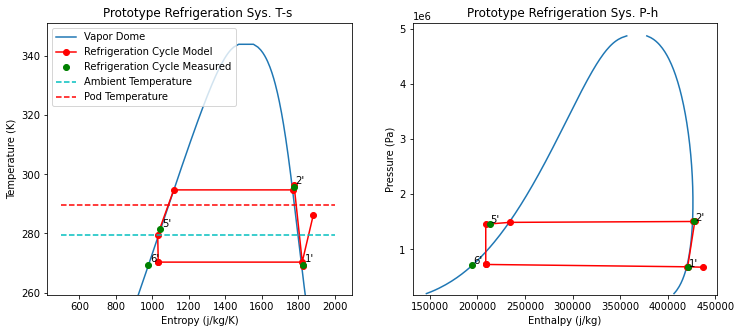

[ 0.02591628 -0.06766978  0.00827501]
5.256939752720479
[0.0039889835278156685, 0.003885603907046807]
909.2789676597454
86.55342148664405


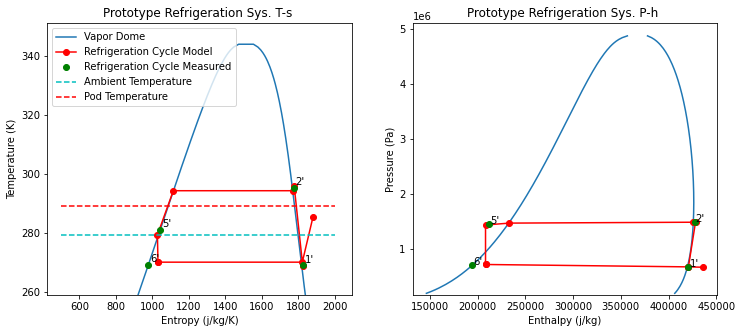

[-0.01109446 -0.04958122  0.05722771]
5.056583040685115
[0.003679677894065394, 0.0037205019466819817]
858.9478954749655
71.95222701852249


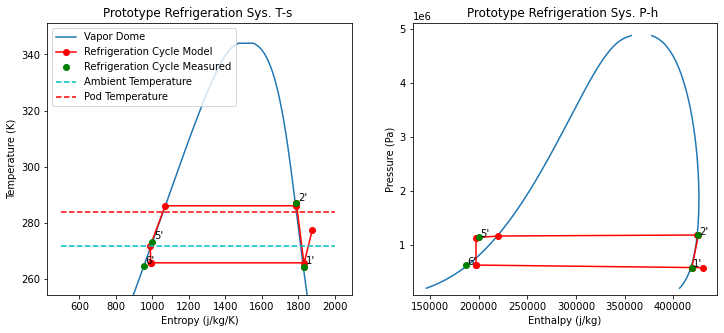

[ 0.00525442 -0.06006499  0.12733249]
5.044281900372552
[0.00373484577667762, 0.003715221317601271]
880.6596292512926
72.3991250966379


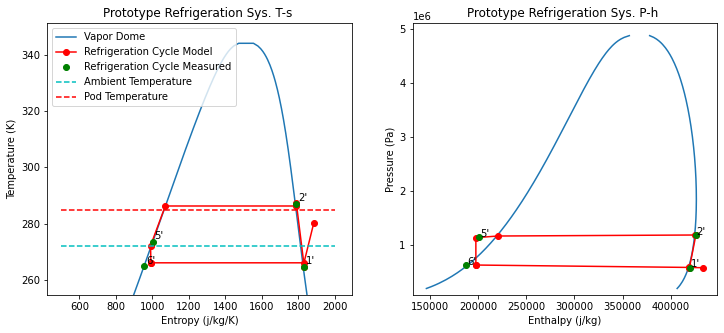

[-0.00611435 -0.05404662  0.05989834]
5.087897054509093
[0.0037042768002680366, 0.0037269260299450093]
869.5096526496312
72.02343981331872


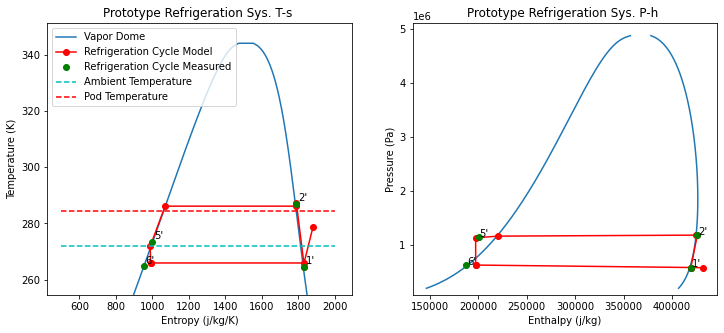

In [13]:

modelData = pd.DataFrame()

for index, row in experimentalData.iterrows():

    Inputs = np.array([row['Total Heat Load (W)'],
                       row['Ambient T (K)'],
                       row['Pod T (K)'],
                       row['Wind Tunnel Velocity (m/s)'],
                      ])
    
    Param = np.array([3550])

    [ P, T, h, s, abcissa, m_dot, Q_L, Q_H, W, Deficit] = make_cycle([row['P (Pa)'][1], row['P (Pa)'][0] + 5e4, 1],
                                                                         Inputs,
                                                                         Param)

    modelData = modelData.append(pd.DataFrame({'P (Pa)': [P], 'T (K)': [T], 'h (j/kg)': [h], 's (j/kg K)': [s], 'abcissa': [abcissa], 
                                  'mass flux (kg/s)': [m_dot], 'Evaporator Heat transfer (W)': Q_L, 'Condenser Heat transfer (W)': Q_H, 'Compressor Work (W)': W, 
                                  'Deficits': [Deficit]}))

    print(Deficit)
    print(experimentalData.iloc[index]['Wind Tunnel Velocity (m/s)'])
    print(m_dot)
    print(Q_L)
    print(W)



    thermodynamic_plots(experimentalData.iloc[index], modelData.iloc[index], lgnd = ['Vapor Dome', 'Refrigeration Cycle Model',
                        'Refrigeration Cycle Measured', 'Ambient Temperature',
                       'Pod Temperature'], annotate = True, color ='r')


modelData = modelData.reset_index()

In [ ]:
m_dot = np.array([])

for index, row in experimentalData.iterrows():
    P_in = row['P (Pa)'][2]
    h_in = row['h (j/kg)'][2] 
    T_in = row['T (K)'][2]
    
    d_coil = 4 * 0.0254
    
    # [m] # 1/16 in OD copper tubing
    D_c = (0.029) * 0.0254 
#     D_c = sym.Symbol('D_c')
    
    
    # length of capillary tube. 4 in diameter coil, 3 loops, 2 tubes.
    L_c = d_coil  * np.pi * 4
#     L_c = sym.Symbol('L_c')

    # Dynamic viscosity of r-410a fluid at inlet temperature
    mu_f = CP.PropsSI('V', 'T', T_in, 'Q', 0, 'R410a')

    # Dynamic viscosity of r-410a vapor at inlet temperature
    mu_g = CP.PropsSI('V', 'T', T_in, 'Q', 1, 'R410a')

    # Density of r-410a fluid at inlet temperature
    rho_f = CP.PropsSI('D', 'T', T_in, 'Q', 0, 'R410a')

    # Density of r-410a vapor at inlet temperature
    rho_g = CP.PropsSI('D', 'T', T_in, 'Q', 1, 'R410a')

    # Specific volume of r-410a fluid at inlet temperature
    v_f = 1 / rho_f

    # Specific volume of r-410a vapor at inlet temperature
    v_g = 1 / rho_g

    # Saturated liquid surface tension of r-410a vapor at inlet temperature
    sigma = CP.PropsSI('I', 'T', T_in, 'Q', 0, 'R410a')

    # Enthalpy of vaporization at inlet temperature
    h_fgc = (CP.PropsSI('H', 'T', T_in, 'Q', 1, 'R410a') - 
             CP.PropsSI('H', 'T', T_in, 'Q', 0, 'R410a'))

    # Enthalpy of fluid at inlet pressure
    h_f = CP.PropsSI('H', 'P', P_in, 'Q', 0, 'R410a')

    # Enthalpy of vaporization at inlet pressure
    h_fg = (CP.PropsSI('H', 'P', P_in, 'Q', 1, 'R410a') - 
             CP.PropsSI('H', 'P', P_in, 'Q', 0, 'R410a'))

    # A generalized continuous empirical correlation for predicting refrigerant
    # mass flow rates through adiabatic capillary tubes

    pi_1 = L_c / D_c
    pi_2 = D_c **2 * h_fgc / v_f**2 / mu_f**2
    pi_3 = D_c * sigma / v_f / mu_f**2
    pi_4 = D_c**2 * P_in /  v_f / mu_f**2
    pi_5 = 1 + (h_in - h_f) / h_fg
    pi_6 = v_g / v_f 
    pi_7 = (mu_f - mu_g) / mu_g
    pi_9 = 1 + L_c /d_coil

    # Check if it is subcooled or mixture
    # mixture
    if h_in > h_f:
        c_5 = -1.971 # two-phase

    # vapor quality = 0
    else:
        c_5 =  0.6436 # subcooled

    pi_8 = 150.26 * pi_1**-0.5708 * pi_2**-1.4636 * pi_4**1.953 * pi_5**c_5 * pi_6**1.4181 * pi_9**-0.0158

    if pi_5 < 0:
        pi_8 = 0
    
    m_dot = np.append( m_dot, 2 * pi_8 * D_c * mu_f)

In [ ]:
print(m_dot)
m_dot[0]/m_dot[9]

In [ ]:
m_dot = np.array([])

for index, row in modelData.iterrows():
    P_in = row['P (Pa)'][4]
    h_in = row['h (j/kg)'][4] 
    T_in = row['T (K)'][4]

#     print(capillary_tube_func(P_in, h_in, T_in))
# D.A. Wolf, R.R. Bittle, M.B. Pate, Adiabatic capillary tube 
# performance with alternative refrigerants, 
# ASHRAE final report No. RP-762, 1995.

    
    d_coil = 2 * 0.0254
    
    # 1/16" in OD copper tubing, .02" wall thickness
    D_c = 1/32 * 0.0254
    
    # length of capillary tube.  in diameter coil, 4 loops, 2 tubes.
    L_c = d_coil * np.pi  * 3
    
    # delta subcool
    T_SC = CP.PropsSI('T', 'P', P_in, 'Q', 0, 'R410a') - T_in

    # Dynamic viscosity of r-410a fluid at inlet temperature
    mu_f = CP.PropsSI('V', 'T', T_in, 'Q', 0, 'R410a')

    # Dynamic viscosity of r-410a vapor at inlet temperature
    mu_g = CP.PropsSI('V', 'P', P_in, 'Q', 1, 'R410a')

    # Density of r-410a fluid at inlet temperature
    rho_f = CP.PropsSI('D', 'P', P_in, 'Q', 0, 'R410a')

    # Density of r-410a vapor at inlet temperature
    rho_g = CP.PropsSI('D', 'P', P_in, 'Q', 1, 'R410a')
    
    # kinematic viscosity of r-410a fluid at inlet temperature
    nu_f = mu_f / rho_f

    # kinematic viscosity of r-410a vapor at inlet temperature
    nu_g = mu_g / rho_g

    # Specific volume of r-410a fluid at inlet temperature
    v_f = 1 / rho_f

    # Specific volume of r-410a vapor at inlet temperature
    v_g = 1 / rho_g

    # Saturated liquid surface tension of r-410a vapor at inlet temperature
    sigma = CP.PropsSI('I', 'P', P_in, 'Q', 0, 'R410a')

    # Enthalpy of vaporization at inlet temperature
    h_fgc = (CP.PropsSI('H', 'T', T_in, 'Q', 1, 'R410a') - 
             CP.PropsSI('H', 'T', T_in, 'Q', 0, 'R410a'))

    # Enthalpy of fluid at inlet pressure
    h_f = CP.PropsSI('H', 'T', T_in, 'Q', 0, 'R410a')

    # Enthalpy of vaporization at inlet pressure
    h_fg = (CP.PropsSI('H', 'P', P_in, 'Q', 1, 'R410a') - 
             CP.PropsSI('H', 'P', P_in, 'Q', 0, 'R410a'))
    
    C_pf = CP.PropsSI('C', 'T', T_in, 'Q', 0, 'R410a')

    # A generalized continuous empirical correlation for predicting refrigerant
    # mass flow rates through adiabatic capillary tubes

    pi_1 = D_c**2 * P_in /  v_f / mu_f**2
    pi_2 = L_c / D_c
    pi_3 = D_c**2 * C_pf * T_SC /  v_f**2 / mu_f**2
    pi_4 = D_c**2 * h_fgc /  v_f**2 / mu_f**2
    pi_5 = sigma * D_c /  v_f / mu_f**2
    pi_6 = d_coil / D_c
    
    if T_SC <= 0:
        m_dot =0
    else:
        pi_7 = (1.5104 * pi_1**0.5351 * pi_2**-0.3785 * pi_3**0.1074 * 
            pi_4**-0.1596 * pi_5**0.0962 * 0.7887 * pi_6**0.0424)
    
    m_dot = np.append(m_dot, D_c * mu_f * pi_7)
    
print(m_dot)
print(m_dot[0]/m_dot[9])

In [ ]:
m_dot = np.array([])

def compr_func( inlet_state, RPM, P_ratio):

    P_e   = inlet_state[0] # Pa
    h_e_o = inlet_state[1] # j/kg

    #Param
    eta_v = 1 -  0.225 * P_ratio        # Compression Ratio
    Disp = 5.25E-6    #[m^3 per rev] #volume displacement

    h_g   = CP.PropsSI('H', 'P', P_e, 'Q', 1, 'R410a')
    if h_e_o < h_g:
        warnings.warn('Flooded Compressor, vapor quality < 1')
    
    rho = CP.PropsSI('D', 'P', P_e, 'H' ,h_e_o, 'R410a')

    m_dot = RPM / 60 * Disp * eta_v * rho

    return m_dot

for index, row in modelData.iterrows():
    m_dot = np.append(m_dot, compr_func[row['P (Pa)'][0], row['h (j/kg)'][0]])

In [ ]:
m_dot = np.array([])

for index, row in modelData.iterrows():
    P_in = row['P (Pa)'][4]
    h_in = row['h (j/kg)'][4] 
    T_in = row['T (K)'][4]

#     print(capillary_tube_func(P_in, h_in, T_in))
# D.A. Wolf, R.R. Bittle, M.B. Pate, Adiabatic capillary tube 
# performance with alternative refrigerants, 
# ASHRAE final report No. RP-762, 1995.

    
    d_coil = 5 * 0.0254
    # 1/16" in OD copper tubing, .02" wall thickness
#     D_c = sym.Symbol('D_c')
    D_c = 0.01525 * 0.0254
    
    # length of capillary tube.  in diameter coil, 4 loops, 2 tubes.
#     L_c = sym.Symbol('L_c')
    L_c = d_coil * np.pi  * 4

    # Saturation Pressure
    P_sat = CP.PropsSI('P', 'T', T_in, 'Q', 0, 'R410a')
    
    # Critical Pressure
    P_crit = CP.PropsSI('PCRIT', 'R410a')
    
    # Critical Temperature
    T_crit = CP.PropsSI('TCRIT', 'R410a')
    
    # delta subcool
    T_SC = CP.PropsSI('T', 'P', P_in, 'Q', 0, 'R410a') - T_in

    # Dynamic viscosity of r-410a fluid at inlet temperature
    mu_f = CP.PropsSI('V', 'T', T_in, 'Q', 0, 'R410a')

    # Dynamic viscosity of r-410a vapor at inlet temperature
    mu_g = CP.PropsSI('V', 'T', T_in, 'Q', 1, 'R410a')

    # Density of r-410a fluid at inlet temperature
    rho_f = CP.PropsSI('D', 'T', T_in, 'Q', 0, 'R410a')

    # Density of r-410a vapor at inlet temperature
    rho_g = CP.PropsSI('D', 'T', T_in, 'Q', 1, 'R410a')
    
    # kinematic viscosity of r-410a fluid at inlet temperature
    nu_f = mu_f / rho_f

    # kinematic viscosity of r-410a vapor at inlet temperature
    nu_g = mu_g / rho_g

    # Specific volume of r-410a fluid at inlet temperature
    v_f = 1 / rho_f

    # Specific volume of r-410a vapor at inlet temperature
    v_g = 1 / rho_g

    # Saturated liquid surface tension of r-410a vapor at inlet temperature
    sigma = CP.PropsSI('I', 'T', T_in, 'Q', 0, 'R410a')

    # Enthalpy of vaporization at inlet temperature
    h_fgc = (CP.PropsSI('H', 'T', T_in, 'Q', 1, 'R410a') - 
             CP.PropsSI('H', 'T', T_in, 'Q', 0, 'R410a'))

    # Enthalpy of fluid at inlet pressure
    h_f = CP.PropsSI('H', 'P', P_in, 'Q', 0, 'R410a')

    # Enthalpy of vaporization at inlet pressure
    h_fg = (CP.PropsSI('H', 'P', P_in, 'Q', 1, 'R410a') - 
             CP.PropsSI('H', 'P', P_in, 'Q', 0, 'R410a'))
    
    C_pf = CP.PropsSI('C', 'P', P_in, 'Q', 0, 'R410a')

    # A generalized continuous empirical correlation for predicting refrigerant
    # mass flow rates through adiabatic capillary tubes

    pi_1 = (P_in - P_sat) / P_crit
    pi_2 = T_SC / T_crit
    pi_3 = L_c / d_coil
    pi_4 = (nu_g - nu_f) / nu_g
    pi_5 = sigma / D_c / P_in
    pi_6 = rho_f * h_fg / P_sat
    
    pi_7 = (0.0081 * pi_1**0.1046 * pi_2**0.0182 * pi_3**-0.3903 * 
            pi_4**-0.8836 * pi_5**-0.1396 *pi_6**0.6712)
    
    
    print(pi_7 * D_c**2 * np.sqrt(P_in * rho_f) )
    m_dot = np.append(m_dot, pi_7 * D_c**2 * np.sqrt(P_in * rho_f))

In [ ]:
m_dot[0]/m_dot[9]

In [ ]:
modelData = pd.DataFrame()

for index, row in experimentalData.iterrows():


    Param = np.array([3550]) # RPM

    Inputs = np.array([row['Total Heat Load (W)'],
                       row['Ambient T (K)'],
                       row['Pod T (K)'],
                       row['Wind Tunnel Velocity (m/s)']
                      ])



    [Props, m_dot, Q_L, Q_H, W, Deficit, converged] = of.solve_cycle_shotgun(Inputs, Param)

    if converged:
        print('converged')
    else:
        warnings.warn('Did not find a solution')

    modelData = modelData.append(pd.DataFrame({'P (Pa)': [Props[0]], 'T (K)': [Props[1]], 'h (j/kg)': [Props[2]], 's (j/kg K)': [Props[3]], 'abcissa': [Props[4]], 
                                  'mass flux (kg/s)': [m_dot], 'Evaporator Heat transfer (W)': Q_L, 'Condenser Heat transfer (W)': Q_H, 'Compressor Work (W)': W, 
                                  'Deficits': [Deficit]}))

    print(Deficit)
    print(W)
    print(m_dot)

    thermodynamic_plots(experimentalData.iloc[index], modelData.iloc[index], lgnd = ['Vapor Dome', 'Refrigeration Cycle model',
                    'Refrigeration Cycle Measured', 'Ambient Temperature',
                   'Pod Temperature'], annotate = True)


In [ ]:
# Plot radial temperature profile
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))


refrigData.plot(x='Time (s)', y=['Temperature  1', 'Temperature 2', 'Temperature 3', 'Temperature 4'], ax=axes[0]).legend(
    ['Low Pressure Liquid', 'Low Pressure Vapor', 
                'High Pressure Vapor', 'High Pressure Liquid'])

axes[0].title.set_text('Prototype Refrigeration Sys. Temperatures')
axes[0].set_ylabel('Temperature (C)')

# Plot pressure measurements
refrigData.plot(x='Time (s)', y=['Pressure Transducer 1 (PaG)', 'Pressure Transducer 3 (PaG)',
                                 'Pressure Transducer 2 (PaG)', 'Pressure Transducer 4 (PaG)'],
                ax=axes[1])
plt.title('Prototype Refrigeration Sys. Pressures')
plt.ylabel('Pressure (kPa gauge)')
axes[1].legend(['Low Pressure Liquid', 'Low Pressure Vapor', 
                'High Pressure Vapor', 'High Pressure Liquid'])
plt.show()



refrigData.plot(x='Time (s)', y=['Thermistor (C)', 'Thermocouple 2 (C)',
                                 'Thermocouple 4 (C) ', 'Thermocouple 7 (C)'], style='-', figsize=(12, 5)).legend(
    ['Ambient'] + [str(loc) + ' cm' for loc in locations], bbox_to_anchor=(.75, .75), loc='upper left')


plt.title('Prototype Internal Radial Temperature Profile')
plt.ylabel('Temperature (C)')
plt.show()


# Plot profile
plt.figure()
plt.plot(locations, radialProfile, 'o')
# Plot ambient temperature
plt.plot([0, 18], [experimentalData['Ambient T (K)'][0], experimentalData['Ambient T (K)'][0]], '--')
plt.plot([0, 18], [experimentalData['Pod T (K)'][0], experimentalData['Pod T (K)'][0]], '--')
plt.ylabel('Temperature (C)')
plt.xlabel('Distance from Heating Element (cm)')
plt.title('Prototype Steady State Radial Profile')
plt.legend(['Thermocouple Rake', 'Ambient Temperature', 'Mean Interior Temperature'])
plt.show()



# Discussion

The results in figure 2 from first experiment show that even with the immersion thermocouples the temperatures at all 4 points are being significantly affected by the temperature gradient with respect to the ambient air. At points 2’ and 5’ the temperatures are well below what would be expected, especially the temperature at point 5’ which if correct would indicate that after compression the refrigerant is still a subcooled liquid. At points 1’ and 6’ the temperatures are above what would be expected for the given pressure and indicate a superheated gas.  This cannot be the case at point 6’ since liquid R-410a exits the Schrader valve when connecting and disconnecting to the port. Due to the high pressure and small diameter of the refrigeration tubing it is not possible to immerse the thermocouples directly into the flow, as a consequence stagnation of the flow may occur in the Schrader valve ports, which in turn leads to the fluid being acted on by the ambient temperature gradient and causing measurement errors

Figure 3 shows a similar result to plots in figure 2. At all points the temperature measurements seem to be experiencing significant error caused by the ambient temperature gradient. It should be noted the temperature at point 2’, which was measured using a surface mount thermocouple, increased substantially but still indicates the fluid to be a subcooled liquid after compression.

Figure 4 shows the results from using all surface mount thermocouples adhered to the refrigerant tubing using thermal paste. The results are significantly better with pressures and temperatures indicating reasonable thermodynamic values for a vapor compression refrigeration cycle. Point 1’ suggests there is little to no superheat occurring during evaporation, point 2’ shows some entropy loss during compression but also superheated gas. Points 5’ and 6’ show values to be expected with significant subcooling after condensation and a nearly saturated refrigerant after expansion. Considering that the temperature difference between a saturated liquid and saturated gas at the evaporating pressure is less than 0.12 degrees K it will be nearly impossible to capture the vapor quality of a mixture after expansion.

- Sight Glass: Emerson Climate AMI-1TT2 
- Drier Filter: Emerson Climate EK 032
- Flow Meter: Emerson  F025S + 1700 transmitter


Work on the controlling unit for the thermal management system has begun and a siemens programmable logic ontroller (PLC) has been selected and ordered. This PLC will work predominately in feedback loops to ensure a reasonable superheat temperature is maintained in the thermal management system as well as monitoring the interior of the POD and protecting the electronics by means of shut off and bypass valves.

- Siemens LOGO! RCE 12/24

# Conclusion and Next Steps

It can be concluded from the results above that the VCRC model predicts accurate working pressures for the refrigeration cycle when the component functions accurately describe the parameters and geometric characteristics of the system. It also be concluded that the experimental temperature measurements need to be improved for better assessment of the VCRC model’s accuracy. 

The next steps for this project are to run additional validation tests with the immersed thermocouples, and to program the siemens logic controller to interface with the thermal management system’s sensors and controllers.
